In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
import math


In [7]:
# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
df



,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [22]:
# Convert 'Date' to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2 KB


In [10]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [11]:
#Checking for missing values
missing_val = df.isnull().sum()
missing_val

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

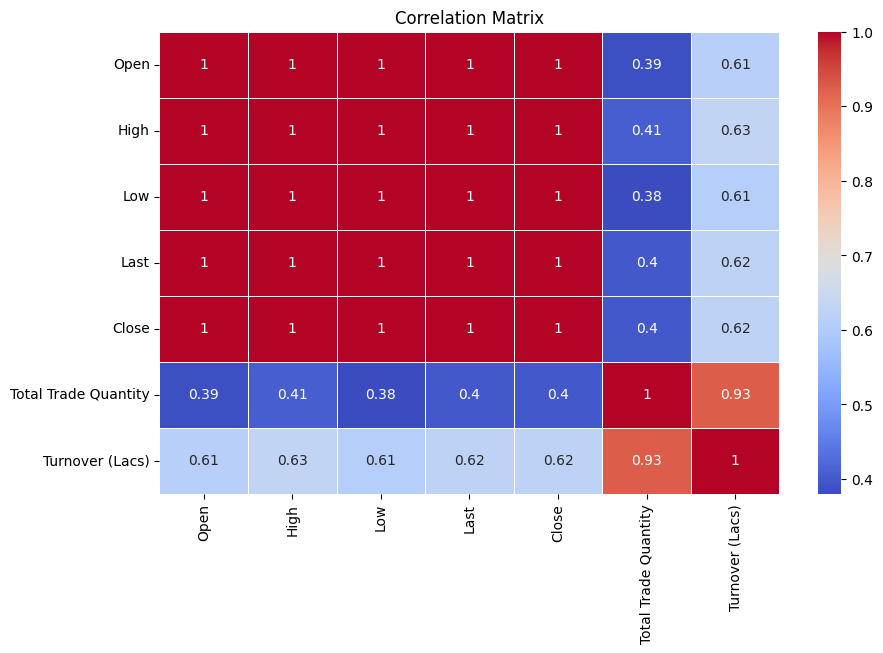

In [8]:
#Correlation matrix for all the features

numeric_df = df.select_dtypes(include=[np.number]) #Selecting only numeric types


correlation_matrix = numeric_df.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [13]:
df


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


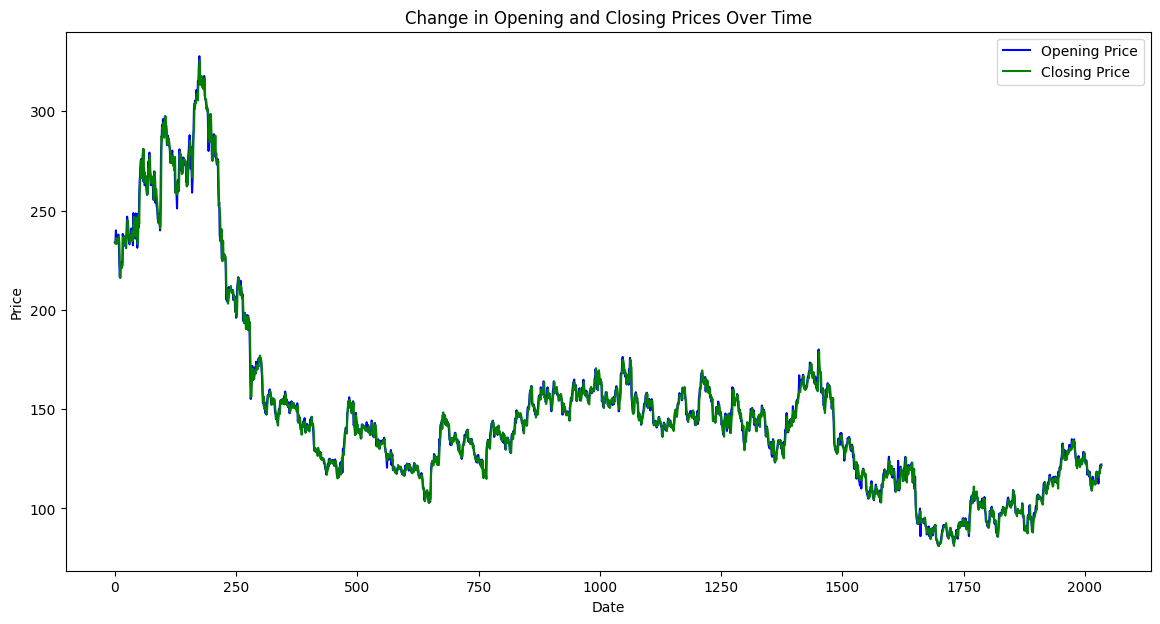

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Open'], label='Opening Price', color='blue')
plt.plot(df.index, df['Close'], label='Closing Price', color='green')
plt.title('Change in Opening and Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


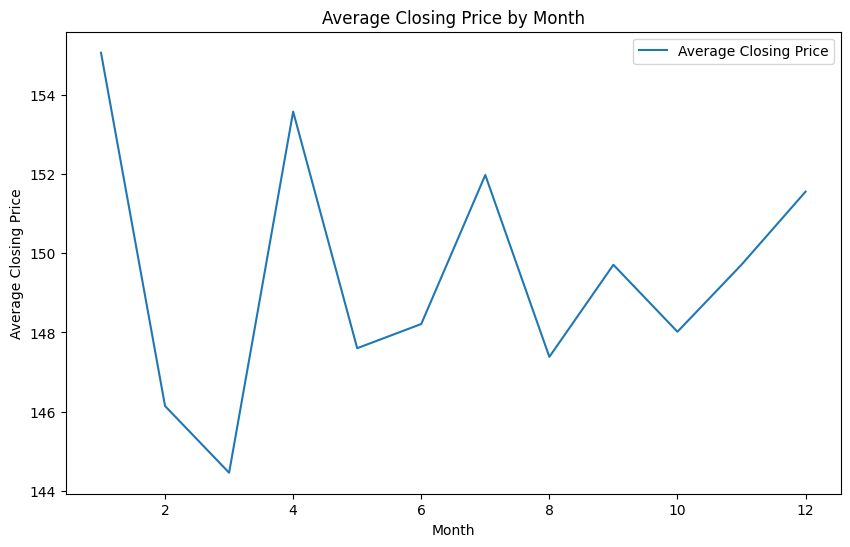

In [23]:
#Seasonal analysis
df['Month'] = df.index.month
df['Year'] = df.index.year

# Average closing price by month
monthly_avg = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values, label='Average Closing Price')
plt.title('Average Closing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.legend()
plt.show()


In [8]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close']])


In [11]:
# Splitting into training and testing set 80 % train and 20 % test

train_size = int(len(scaled_df) * 0.8)
train_df = scaled_df[:train_size]
test_df = scaled_df[train_size:]


In [14]:
# Function to create sequences

def create_sequences(df, time_step):
    x , y = [] , []
    for i in range(len(df) - time_step):
       
       x.append(df[i:i + time_step])
       y.append(df[i + time_step, 3])
    return np.array(x), np.array(y)




In [16]:
time_step = 60
x_train, y_train = create_sequences(train_df, time_step)
x_test, y_test = create_sequences(test_df, time_step)

In [17]:
# Reshaping as per the LSTM model

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],4)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 4))


In [20]:
# Building the LSTM model

model = Sequential()
model.add(LSTM(100,return_sequences= True, input_shape = (time_step, 4)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))


In [21]:
model.compile(optimizer= 'adam', loss='mse')

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 100)        │        42,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,501 (478.52 KB)

 Trainable params: 122,501 (478.52 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64, verbose=1)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 385ms/step - loss: 0.0337 - val_loss: 7.0562e-04
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step - loss: 0.0025 - val_loss: 3.2234e-04
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - loss: 0.0015 - val_loss: 2.8606e-04
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 243ms/step - loss: 0.0013 - val_loss: 2.8644e-04
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - loss: 0.0013 - val_loss: 3.3539e-04
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 305ms/step - loss: 0.0014 - val_loss: 2.8932e-04
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 329ms/step - loss: 0.0014 - val_loss: 2.5426e-04
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 335ms/step - loss: 0.0010 - val_loss: 2.7160e-04
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 346ms/step - loss: 0.0012 - val_loss: 2.7352e-04
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 333ms/step - loss: 0.0012 - val_loss: 2.7077e-04
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 312ms/step - loss: 0.0015 - val_loss: 2.9172e-04
Epo

In [24]:

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


In [25]:

# Inverse transform predictions to get actual values
train_predict = scaler.inverse_transform(np.concatenate([np.zeros((train_predict.shape[0], 3)), train_predict], axis=1))[:, 3]
test_predict = scaler.inverse_transform(np.concatenate([np.zeros((test_predict.shape[0], 3)), test_predict], axis=1))[:, 3]


In [26]:
#  Inverse transform actual test values
y_test_actual = scaler.inverse_transform(np.concatenate([np.zeros((y_test.shape[0], 3)), y_test.reshape(-1, 1)], axis=1))[:, 3]

In [27]:
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test_actual, test_predict))
print(f'Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')

Train RMSE: 163.7645780686407, Test RMSE: 2.721338826340726


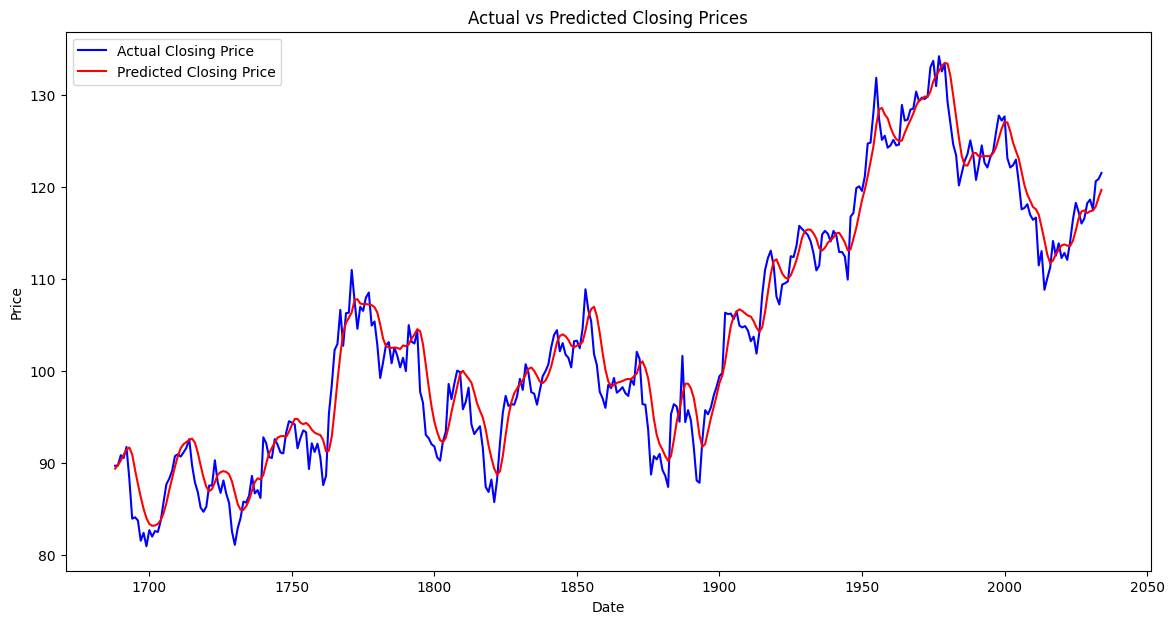

In [28]:
# Plotting the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(df.index[train_size + time_step:], y_test_actual, label='Actual Closing Price', color='blue')
plt.plot(df.index[train_size + time_step:], test_predict, label='Predicted Closing Price', color='red')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()